C:\Users\Rick\PycharmProjects\pythonProject1\visualization\creature_rendering.py:13: RuntimeWarning: invalid value encountered in double_scalars
  slope = (y1 - y0) / (x1 - x0)
C:\Users\Rick\PycharmProjects\pythonProject1\visualization\creature_rendering.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  step_size = 1 / length_of_line


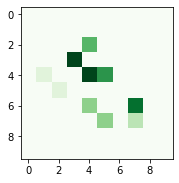

{'world_size': 10,
 'global_creature_id_counter': 8,
 'world_array': array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 4, 0, 0, 0, 0, 0],
        [0, 0, 0, 7, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 7, 5, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 3, 0, 0, 6, 0, 0],
        [0, 0, 0, 0, 0, 3, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
 'carbon_dioxide_map': array([[5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 4, 5, 5, 5, 5, 5],
        [5, 5, 5, 4, 5, 5, 5, 5, 5, 5],
        [5, 4, 5, 5, 4, 4, 5, 5, 5, 5],
        [5, 5, 4, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 4, 5, 5, 4, 5, 5],
        [5, 5, 5, 5, 5, 4, 5, 4, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]]),
 'plants': [array([[ 1.,  5.,  2.,  0.,  2.],
         [ 1.,  0.,  0., -1., -1.]]),
  array([[2., 7., 7., 

In [34]:
%reload_ext autoreload
%autoreload

import numpy as np
import creature_spawning.spawn_creature as sc
import visualization.creature_rendering as creature_render
import visualization.array_rendering as ar

def photosynthesize(world_params):
    # for plant_id in enumerate(world_params['world_array'][np.nonzero(world_params['world_array'])]):
    occupied_squares = np.nonzero(world_params['world_array'])
    for index, x in enumerate(occupied_squares[0]):
        y = occupied_squares[1][index]
        world_params['plants'][int(np.round(world_params['world_array'][x][y])) - 1][0][4] += 1
        world_params['carbon_dioxide_map'][x][y] -= 1


world_params = { 'world_size': 10,
                 'global_creature_id_counter': int(1) }

world_params['world_array'] = np.zeros(shape=(world_params['world_size'], world_params['world_size']), dtype=int)

world_params['carbon_dioxide_map'] = np.full(shape=(world_params['world_size'], world_params['world_size']),
                             fill_value=5)

sc.spawn_new_plants(world_params=world_params,
                             num_plants=7)

creature_render.place_creatures(world_params)

photosynthesize(world_params)

ar.render_array(world_params['world_array'])

world_params